# Week 4

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from operator import itemgetter
%matplotlib inline

In [2]:
from operator import itemgetter

def orderDict(x: dict, desc=True):
    return sorted(x.items(), key=itemgetter(1), reverse=desc)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


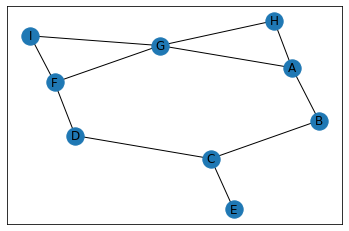

In [3]:
g = nx.Graph()
g.add_edges_from([
    ('A', 'H'), ('H', 'G'), ('I', 'G'), ('I', 'F'), 
    ('A', 'G'), ('G', 'F'), ('A', 'B'), ('F', 'D'), 
    ('B', 'C'), ('D', 'C'), ('C', 'E')
])

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

### Degree Distribution

The degree distribution, ```P(k)``` of a network is the number of nodes of degree ```k```, divided by the total number of nodes, i.e.:

```P(k) = (# nodes with k-degree) / len(g.nodes())```

In [4]:
nodes_cnt = len(g.nodes())
nodes_cnt

9

In [5]:
dg_values = sorted(set(dict(g.degree()).values()))
dg_values

[1, 2, 3, 4]

In [6]:
higher_degree = orderDict(dict(g.degree()))[0][1]
higher_degree

4

In [7]:
degrees = [degree for node, degree in g.degree()]
degrees

[3, 2, 4, 2, 3, 2, 2, 3, 1]

In [8]:
dg_cnt = {}

# We could start from degree zero, but we know theres no node with such degree
for d in range(1, higher_degree + 1): 
    dg_cnt[str(d)] = degrees.count(d)

dg_cnt

{'1': 1, '2': 4, '3': 3, '4': 1}

In [9]:
dg_dist = {}

for dg, cnt in dg_cnt.items():
    dg_dist[dg] = (cnt/nodes_cnt)

dg_dist

{'1': 0.1111111111111111,
 '2': 0.4444444444444444,
 '3': 0.3333333333333333,
 '4': 0.1111111111111111}

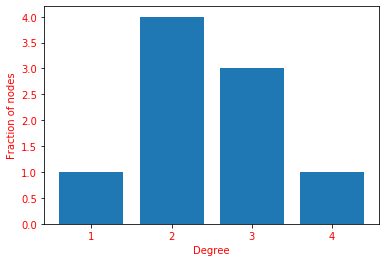

In [30]:
plt.bar(x=dg_cnt.keys(), height=dg_cnt.values())

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.xlabel('Degree').set_color("red")
plt.ylabel('Fraction of nodes').set_color("red")


### Common neighbors
We define it as ```common(X,Y) = |N(X) inter N(Y)|```,
where N(X) is the set of neighbors of node X

###### # Example 1

In [2]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('B', 'C'), ('B', 'D'), ('A', 'D'), 
        ('D', 'C'), ('A', 'E'), ('C', 'F'), ('E', 'F'), 
        ('E', 'G'), ('F', 'G'), ('G', 'H'), ('G', 'I')
    ]
)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


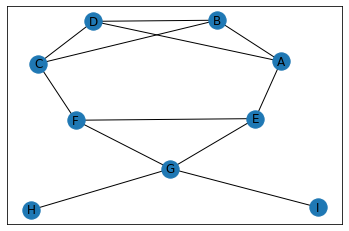

In [3]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [4]:
list(nx.common_neighbors(g, 'H', 'I'))

['G']

In [5]:
list(nx.common_neighbors(g, 'C', 'A'))

['B', 'D']

In [6]:
(
    list(nx.common_neighbors(g, 'G', 'A')),
    list(nx.common_neighbors(g, 'I', 'A'))
)

(['E'], [])

In [7]:
# all common neighbors
comm_neig = [(e[0], e[1], len(list(nx.common_neighbors(g, e[0], e[1])))) for e in nx.non_edges(g)]

comm_neig[:5]

[('A', 'H', 0), ('A', 'G', 1), ('A', 'C', 2), ('A', 'F', 1), ('A', 'I', 0)]

In [8]:
sorted(comm_neig, key=itemgetter(2), reverse=True)[:5]

[('A', 'C', 2), ('A', 'G', 1), ('A', 'F', 1), ('H', 'E', 1), ('H', 'F', 1)]

### Jaccard Coefficient

Number of neighbors normalized by the total number of neighbors

In [9]:
sorted(list(nx.jaccard_coefficient(g)), key=itemgetter(2), reverse=True)[:5]

[('H', 'I', 1.0),
 ('A', 'C', 0.5),
 ('H', 'E', 0.3333333333333333),
 ('H', 'F', 0.3333333333333333),
 ('E', 'I', 0.3333333333333333)]

### Resource Allocation Index

Fraction of a 'resource' that a node can send to another through their common neighbors

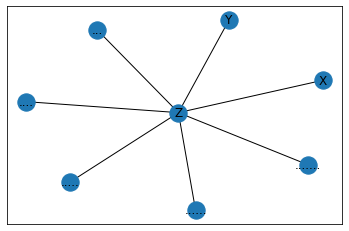

In [10]:
_g = nx.Graph()
_g.add_edges_from([('X', 'Z'), ('Z', 'Y'), 
                   ('Z', '...'), ('Z', '....'),
                   ('Z', '.....'), ('Z', '......'),
                   ('Z', '.......'), ])

nx.draw_networkx(_g, nx.kamada_kawai_layout(_g))

```X``` wants to sends 1 unit of information to ```Y```;

```X``` gives ```1/degree(X)``` to each of its neighbors;

```Z``` receives ```1/degree(X)``` of that information;

```Z``` fowards ```(1/degree(X))/degree(Z)``` to ```Y```